# Perceptron en SkLearn

## Carga de datos

In [1]:
# carfar los paquetes requeridos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml

In [2]:
# cargar el dataset desde OpenML
diabetes = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes.frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## Pre-procesamiento

In [4]:
# separa caracteristicas (X) y etiqueta (Y)
# obtener X eliminando la columna de etiqueta
X = df.drop(columns=['class'])
# Obtener Y convirtiendo la etiqueta en un valor numerico
Y = df['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

In [5]:
# dividir el dataser en entrenamiento (80%) y prueba (20%)
Xtrain, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=26, stratify=Y)

In [6]:
# estandarizar las caracteristicas (importante para el perceptron)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
X_test = scaler.fit_transform(X_test)

In [7]:
# crear y entrenar del perceptron
perceptron = Perceptron(max_iter=2000, eta0=0.01, random_state=26)
perceptron.fit(Xtrain, Y_train)

Perceptron(eta0=0.01, max_iter=2000, random_state=26)

In [8]:
# Realizar predicciones
Y_pred = perceptron.predict(X_test)

## Evaluacion de la eficiencia del modelo

In [9]:
eficiencia = accuracy_score(Y_test, Y_pred)
print(f'Precision delperceptron: {eficiencia: 2f}')
print('\nReporte de clasificacion:')
print(classification_report(Y_test, Y_pred))

Precision delperceptron:  0.766234

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



## matrices de peso

In [10]:
# obtener los pesos (matriz de coeficientes)
peoss= perceptron.coef_
# obtenr el sesgo (termino de sesgo o bias)
sesgo = perceptron.intercept_

In [11]:
# mostrar los resultados
print('MAtriz de pesos:')
print(peoss)
print('\n Vector de sesgo (bias)')
print(sesgo)

MAtriz de pesos:
[[ 0.01439627  0.05285947 -0.00581887  0.01734709 -0.00393253  0.01565109
   0.03479192  0.00115098]]

 Vector de sesgo (bias)
[-0.01]


## grafica de frontera de decision

In [12]:
import matplotlib.pyplot as plt

In [13]:
# seleccionar solo dos caracteristicas (glucosa e IMC)
X_subset = Xtrain[:,[1,5]]
Y_subset = Y_train

In [14]:
perceptron.fit(X_subset, Y_subset)

Perceptron(eta0=0.01, max_iter=2000, random_state=26)

In [15]:
# obtener pesos y bias
w = perceptron.coef_
b = perceptron.intercept_

In [16]:
# Crear una linea de decision
x1_min, x1_max = X_subset[:,0].min(), X_subset[:,0].max()
x2_min, x1_max = X_subset[:,1].min(), X_subset[:,1].max()
x1_values = np.linspace(x1_min, x1_max, 100)
x2_values = (-w[0][0] / w[0][1])*x1_values - (b[0]/w[0][1])


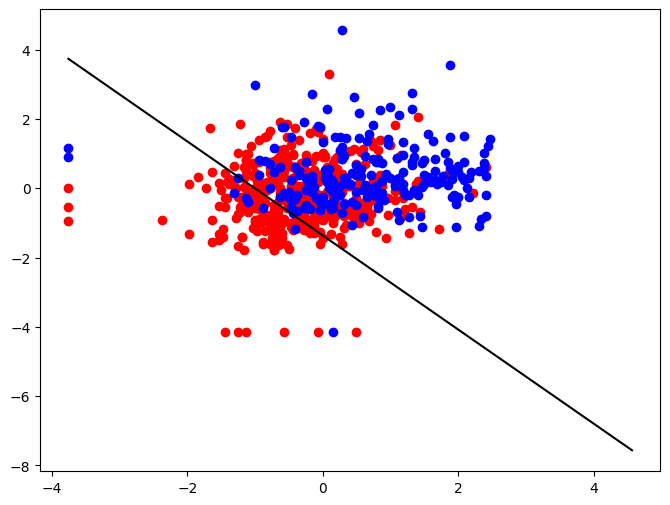

In [17]:
# graficar puntos de datos
plt.figure(figsize=(8,6))
plt.scatter(X_subset[Y_subset==0][:,0], X_subset[Y_subset==0][:,1], color='red', label='No diabetes')
plt.scatter(X_subset[Y_subset==1][:,0], X_subset[Y_subset==1][:,1], color='blue', label='Diabetes')
plt.plot(x1_values, x2_values, 'k-', label="Fronterade de decision")

In [39]:
from sklearn.neural_network import MLPClassifier

# Crear un perceptron multicapa con 1 capa de 3 neuronas
mlp = MLPClassifier(hidden_layer_sizes=(5,2,), activation='logistic', max_iter=1500, random_state=26)

# Extraer el modelo
mlp.fit(Xtrain, Y_train)

# Verificar la cantidad de capas
print(f'Numero de capas en la red: {len(mlp.coefs_)} (Incluye capa oculta y salida)')
print(f'Neuronas en la capa oculta: {mlp.hidden_layer_sizes[0]}')

Numero de capas en la red: 3 (Incluye capa oculta y salida)
Neuronas en la capa oculta: 5


In [41]:
# Obtener pesos y bias
w = mlp.coefs_
b= mlp.intercepts_
print(w)
print(b)

[array([[-0.64018824, -0.52590957,  0.72305173,  0.64494526, -0.28017041],
       [-1.44189521, -1.36303398,  1.4386384 ,  1.50937392, -1.40331646],
       [ 0.22732518,  0.32624801, -0.37175247, -0.33324465,  0.24542416],
       [ 0.02956135,  0.33070614,  0.04019845, -0.17574068,  0.09773754],
       [-0.01764609, -0.01756224,  0.23521631, -0.04178848,  0.06990925],
       [-0.82061915, -0.70425559,  0.92192306,  0.9548518 , -0.73521169],
       [-0.35043506, -0.26528824,  0.61512136,  0.43506852, -0.53000217],
       [-0.04757726, -0.72407248, -0.15234284,  0.3241658 , -0.43969265]]), array([[ 1.73027077,  1.40857035],
       [ 0.69786205,  1.25740122],
       [-1.30717121, -1.39731241],
       [-2.02626723, -1.46438406],
       [ 1.39389827,  1.29250838]]), array([[-0.9636261 ],
       [-1.76329801]])]
[array([ 0.01016638, -0.09037613, -0.24825133,  0.02631829,  0.07385195]), array([-0.25349534, -0.60741639]), array([0.51300132])]


In [42]:
# Realizar predicciones
y_pred2 = mlp.predict(X_test)

In [43]:
eficiencia2 = accuracy_score(Y_test, y_pred2)
print(f'Eficiencia del perceptron multicapa: {eficiencia2: 2f}')
print(f'\nReporte de clasificacion:')
print(classification_report(Y_test, y_pred2))

Eficiencia del perceptron multicapa:  0.766234

Reporte de clasificacion:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       100
           1       0.70      0.57      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



In [45]:
# importar tensorflow 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [47]:
model = Sequential()

In [48]:
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

C:\Users\gamer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 29, 16)              │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 29, 16)              │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 28, 32)              │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 896)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          28,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,033 (117.32 KB)

 Trainable params: 29,937 (116.94 KB)

 Non-trainable params: 96 (384.00 B)

In [50]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
history = model.fit(Xtrain, Y_train, epochs=35, verbose=1, validation_data=(X_test, Y_test))

ValueError: Invalid dtype: category